In [2]:
from __future__ import division, unicode_literals, print_function, absolute_import
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist_digits = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()

In [4]:
classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [5]:
print('Train data shape: ', format(x_train.shape))
print('Train data label length: ', format(len(y_train)))
print('Train data label values: ', format(y_train))

Train data shape:  (60000, 28, 28)
Train data label length:  60000
Train data label values:  [5 0 4 ... 5 6 8]


In [6]:
print('Test data shape: ', format(x_test.shape))
print('Test data label length: ', format(len(y_test)))
print('Test data label values: ', format(y_test))

Test data shape:  (10000, 28, 28)
Test data label length:  10000
Test data label values:  [7 2 1 ... 4 5 6]


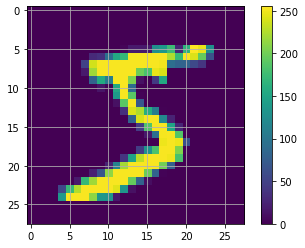

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(True)
plt.show()

x_train, x_test = x_train / 255.0, x_test / 255.0

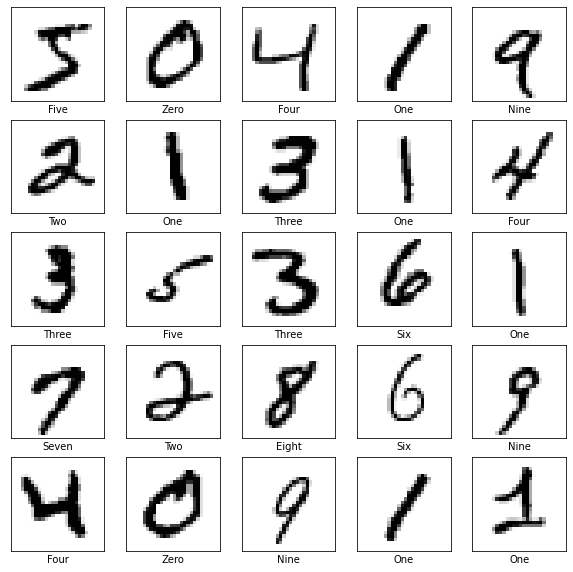

In [8]:
def plot_training_images():
    plt.figure(figsize=(10, 10))
    for i in range (25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i], cmap=plt.cm.binary)
        plt.xlabel(classes[y_train[i]])
    plt.show()
plot_training_images()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

2023-02-28 14:53:27.555738: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/oracle/instantclient_21_4
2023-02-28 14:53:27.555847: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-28 14:53:27.555936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (desktop): /proc/driver/nvidia/version does not exist
2023-02-28 14:53:27.639647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

2023-02-28 14:53:30.673441: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2588 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1136 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0787 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0584 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9857


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

2023-02-28 14:54:03.066848: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 2ms/step - loss: 0.0867 - accuracy: 0.9733
Test accuracy: 0.9732999801635742


In [13]:
predictions = model.predict(x_test)
print('Values of prediction', predictions[0])
print('Number of max class prediction:', np.argmax(predictions[0]))
print('Name of class prediction:', classes[np.argmax(predictions[0])])

 48/313 [===>..........................] - ETA: 0s 

2023-02-28 14:54:06.321442: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step
Values of prediction [9.2110682e-08 5.5588263e-09 1.9597168e-05 1.1593212e-03 5.3772709e-11
 3.8610979e-06 2.3192864e-11 9.9872524e-01 8.8464162e-07 9.1076952e-05]
Number of max class prediction: 7
Name of class prediction: Seven


In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label], 
                                         100 * np.max(predictions_array),
                                         classes[true_label],
                                         color=color))

In [15]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

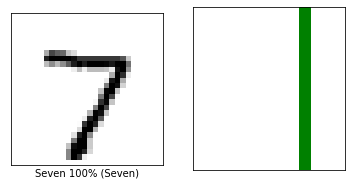

In [16]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)
plt.show()



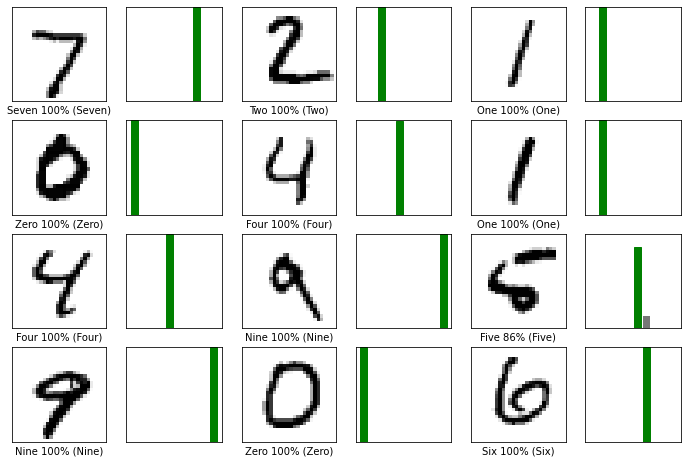

In [17]:
num_rows = 4
num_cols = 3
num_images= num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)
plt.show()